<a href="https://colab.research.google.com/github/norannali/CIFAR-10-Image-Classification-using-CNN/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 CIFAR-10 Image Classification using CNN

This notebook builds a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset into 10 categories, including airplanes, cars, birds, cats, etc.


# **1.mport Libraries**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# **2. Load and Prepare Data**

In [2]:
# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
print('X_train Shape: {}'.format(x_train.shape))
print('X_test Shape: {}'.format(x_test.shape))
print('Y_train Shape: {}'.format(y_train.shape))
print('Y_test Shape: {}'.format(y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


In [5]:
# Normalizing
X_train = x_train/255
X_test = x_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(y_train,10)
Y_test_en = to_categorical(y_test,10)

In [11]:
# Class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

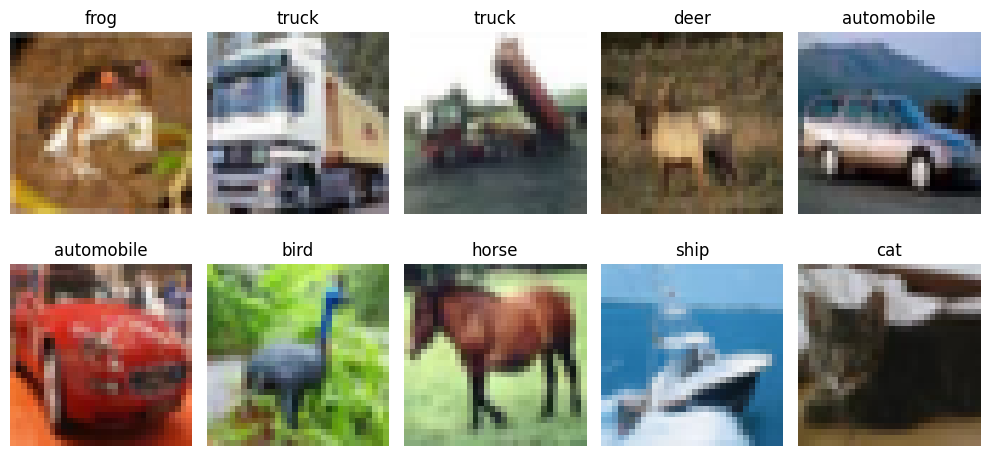

In [12]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Simplified CNN model with Batch Normalization
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(64, (4, 4), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (4, 4), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolutional Block 2
model.add(Conv2D(128, (4, 4), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4, 4), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 3
model.add(Conv2D(128, (4, 4), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4, 4), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 10 classes for output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,517,450 (5.79 MB)

 Trainable params: 1,515,658 (5.78 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history =model.fit(X_train, Y_train_en, epochs = 25, verbose = 1,batch_size = 64 ,validation_data = (X_test, Y_test_en))

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 43ms/step - accuracy: 0.3535 - loss: 2.0562 - val_accuracy: 0.5748 - val_loss: 1.2431
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 29ms/step - accuracy: 0.6478 - loss: 1.0000 - val_accuracy: 0.3664 - val_loss: 2.5259
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7271 - loss: 0.7836 - val_accuracy: 0.7050 - val_loss: 0.8496
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.7816 - loss: 0.6334 - val_accuracy: 0.7778 - val_loss: 0.6473
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8084 - loss: 0.5508 - val_accuracy: 0.7867 - val_loss: 0.6291
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8355 - loss: 0.4800 - val_accuracy: 0.8018 - val_loss: 0.5818
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.8585 - loss: 0.4164 - val_accuracy: 0.8225 - val_loss: 0.5591
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.8752 - loss: 0.3626 - 

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test_en, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.8634


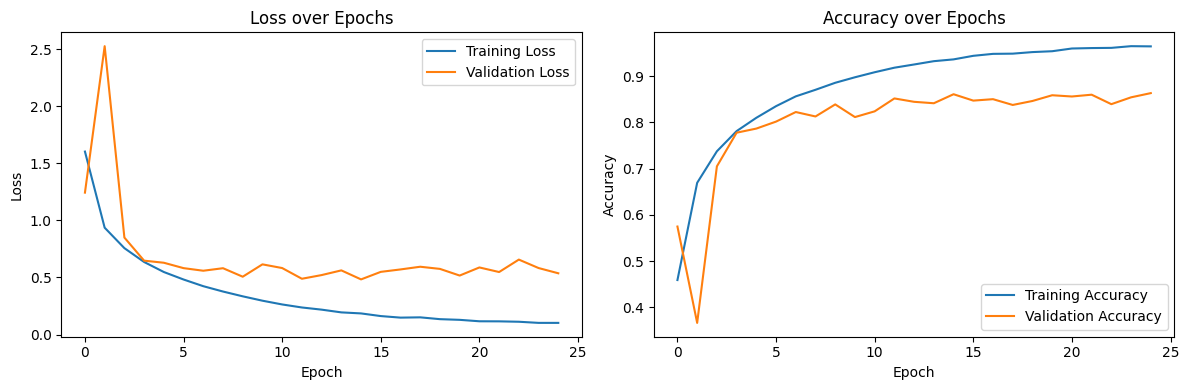

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions from the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test_en, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes)

print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.92      0.94      0.93      1000
           2       0.77      0.83      0.80      1000
           3       0.78      0.74      0.76      1000
           4       0.88      0.82      0.85      1000
           5       0.82      0.77      0.80      1000
           6       0.87      0.91      0.89      1000
           7       0.90      0.91      0.90      1000
           8       0.95      0.90      0.92      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


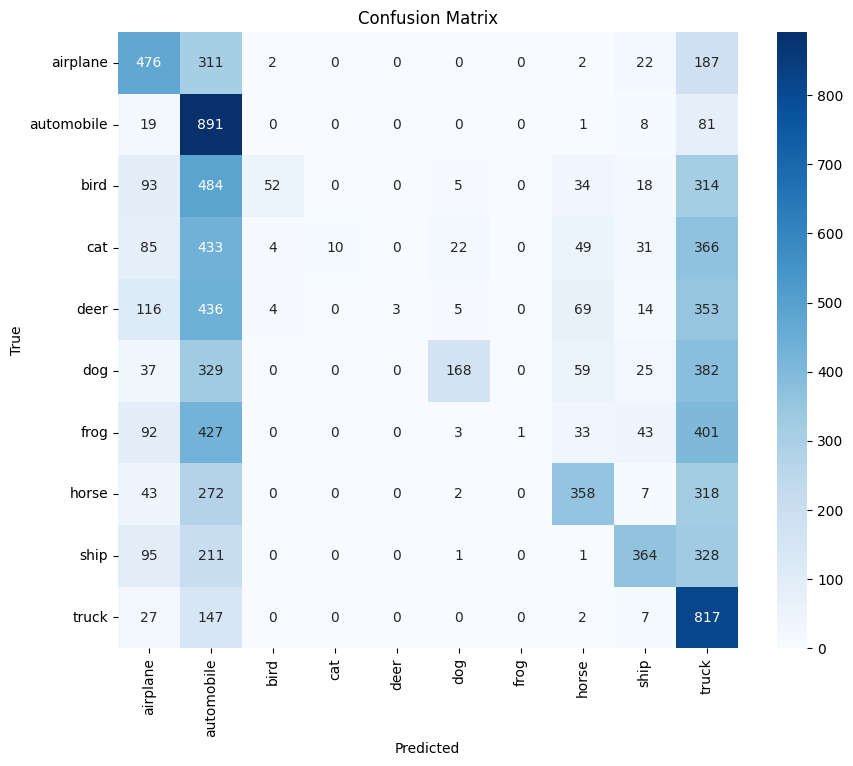

In [16]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

conf_mat = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## ✅ Summary

- CNN model trained on CIFAR-10 using Keras
- Achieved ~86% validation accuracy
- Used BatchNormalization and Dropout to improve generalization
- Future work: Try data augmentation or transfer learning (e.g., MobileNet)
